## 1. 모델 성능 향상 (14장)

### - 와인 품종 분류

In [5]:
import pandas as pd

w_df = pd.read_csv('./data/wine.csv', header= None)

w_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

X = w_df.iloc[:, 0:12]
y = w_df.iloc[:, 12]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

display(X_train)
display(y_train)

,0,1,2,3,4,5,6,7,8,9,10,11
3236,8.1,0.12,0.49,1.2,0.042,43.0,160.0,0.99340,3.13,0.48,9.7,6
5949,7.0,0.36,0.25,5.7,0.015,14.0,73.0,0.98963,2.82,0.59,13.2,6
3784,7.5,0.18,0.31,11.7,0.051,24.0,94.0,0.99700,3.19,0.44,9.5,7
4993,6.5,0.25,0.45,7.8,0.048,52.0,188.0,0.99576,3.20,0.53,9.1,5
5177,6.7,0.22,0.22,1.2,0.038,5.0,124.0,0.99098,3.10,0.37,11.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
5650,6.8,0.30,0.27,11.6,0.028,22.0,97.0,0.99314,2.96,0.38,11.7,6
4257,6.5,0.15,0.44,12.6,0.052,65.0,158.0,0.99688,3.26,0.70,10.3,7
3320,8.2,0.15,0.48,2.7,0.052,24.0,190.0,0.99500,3.50,0.45,10.9,7


3236    0
5949    0
3784    0
4993    0
5177    0
       ..
588     1
5650    0
4257    0
3320    0
2595    0
Name: 12, Length: 5197, dtype: int64

In [12]:
# 모델 구조 설정.

model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation ='relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))
model.summary()
          

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split=0.25)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.2485 - loss: 22.0210 - val_acc: 0.2546 - val_loss: 16.6833
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.2452 - loss: 15.3852 - val_acc: 0.2546 - val_loss: 10.9236
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.2347 - loss: 9.8912 - val_acc: 0.2546 - val_loss: 6.3030
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.2471 - loss: 5.4220 - val_acc: 0.2546 - val_loss: 3.0899
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2366 - loss: 2.6843 - val_acc: 0.2369 - val_loss: 1.4324
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.2240 - loss: 1.1989 - val_acc: 0.6377 - val_loss: 0.7023
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6794 - loss: 0.6957 - val_acc: 0.7669 - val_loss: 0.6705
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7818 - loss: 0.6712 - val_acc: 0.8246 - val_loss: 0.6494
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8336 - loss: 0.6515 - val_

In [14]:
score = model.evaluate(X_test, y_test)
print('Test accuary:', score)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - acc: 0.9277 - loss: 0.4446
Test accuary: [0.4378059208393097, 0.9338461756706238]


## 훈련 진행 시 모델 저장

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = './data/model/all/{epoch:02d}-{val_acc:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [29]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split=0.25, callbacks=[checkpointer], verbose =0)


Epoch 1: saving model to ./data/model/all/01-0.9508.keras

Epoch 2: saving model to ./data/model/all/02-0.9554.keras

Epoch 3: saving model to ./data/model/all/03-0.9523.keras

Epoch 4: saving model to ./data/model/all/04-0.9546.keras

Epoch 5: saving model to ./data/model/all/05-0.9546.keras

Epoch 6: saving model to ./data/model/all/06-0.9538.keras

Epoch 7: saving model to ./data/model/all/07-0.9631.keras

Epoch 8: saving model to ./data/model/all/08-0.9592.keras

Epoch 9: saving model to ./data/model/all/09-0.9600.keras

Epoch 10: saving model to ./data/model/all/10-0.9623.keras

Epoch 11: saving model to ./data/model/all/11-0.9638.keras

Epoch 12: saving model to ./data/model/all/12-0.9569.keras

Epoch 13: saving model to ./data/model/all/13-0.9531.keras

Epoch 14: saving model to ./data/model/all/14-0.9546.keras

Epoch 15: saving model to ./data/model/all/15-0.9723.keras

Epoch 16: saving model to ./data/model/all/16-0.9631.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [30]:
score = model.evaluate(X_test, y_test)
print('Test accuary:', score)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - acc: 0.9714 - loss: 0.0843
Test accuary: [0.0868404284119606, 0.9738461375236511]


## 그래프로 과적합 확인하기.

In [ ]:
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split=0.25)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9719 - loss: 0.0871 - val_acc: 0.9800 - val_loss: 0.0713
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9711 - loss: 0.0875 - val_acc: 0.9785 - val_loss: 0.0700
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9719 - loss: 0.0819 - val_acc: 0.9800 - val_loss: 0.0695
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9690 - loss: 0.0903 - val_acc: 0.9792 - val_loss: 0.0698
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9756 - loss: 0.0817 - val_acc: 0.9823 - val_loss: 0.0699
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9741 - loss: 0.0901 - val_acc: 0.9754 - val_loss: 0.0695
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9728 - loss: 0.0860 - val_acc: 0.9777 - val_loss: 0.0681
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9686 - loss: 0.0965 - val_acc: 0.9754 - val_loss: 0.0724
Epoch 9/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9722 - loss: 

In [33]:
hist_df = pd.DataFrame(history.history)
hist_df

,acc,loss,val_acc,val_loss
0,0.971773,0.087199,0.980000,0.071301
1,0.971773,0.088357,0.978462,0.069969
2,0.969977,0.087484,0.980000,0.069537
3,0.971517,0.088416,0.979231,0.069797
4,0.971773,0.089491,0.982308,0.069895
...,...,...,...,...
1995,0.989479,0.033870,0.986923,0.051193
1996,0.989736,0.033759,0.988462,0.041019
1997,0.988453,0.035845,0.987692,0.041733
1998,0.988966,0.033181,0.988462,0.040897


In [34]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

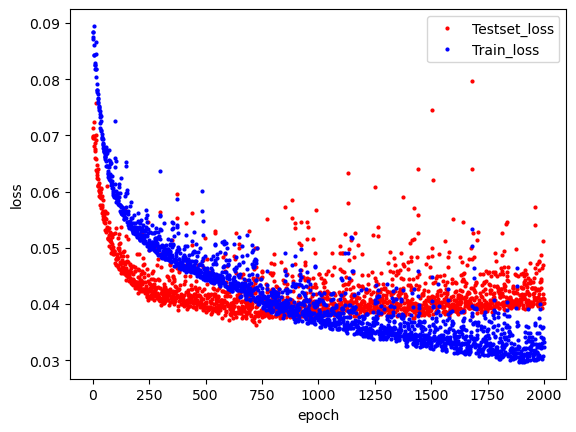

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c= 'red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c= 'blue', markersize=2, label='Train_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## callback - early stopping

In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_callbacks = EarlyStopping(monitor= 'val_loss', patience = 20)

modelpath = './data/model/all/Ch14-4-bestmodel.keras'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor= 'val_loss', verbose = 0, save_best_only=True)

history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25, verbose = 1,
                    callbacks =[early_stopping_callbacks, checkpointer])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9922 - loss: 0.0251 - val_acc: 0.9877 - val_loss: 0.0392
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9906 - loss: 0.0288 - val_acc: 0.9877 - val_loss: 0.0403
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9932 - loss: 0.0258 - val_acc: 0.9877 - val_loss: 0.0396
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9903 - loss: 0.0305 - val_acc: 0.9877 - val_loss: 0.0401
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9936 - loss: 0.0269 - val_acc: 0.9862 - val_loss: 0.0435
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9938 - loss: 0.0283 - val_acc: 0.9869 - val_loss: 0.0443
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9889 - loss: 0.0346 - val_acc: 0.9885 - val_loss: 0.0401
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9906 - loss: 0.0288 - val_acc: 0.9877 - val_loss: 0.0409
Epoch 9/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9927 - loss: 

In [49]:
score = model.evaluate(X_test, y_test)
print('Test accuarcy: ', score)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - acc: 0.9895 - loss: 0.0375
Test accuarcy:  [0.04173363372683525, 0.9884615540504456]
